In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.style as style

import pandas.api.types as pdtypes

from plotnine import *
from plydata import *

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Times New Roman'
sns.set_context("paper", font_scale=1.30, rc={"lines.linewidth": 0.8})

C:\Users\falco\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\falco\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\falco\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
orders = pd.read_csv('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/order_sharing_data.csv')
orders.head()

,Unnamed: 0,h,Order,Class,Species ID
0,0,CETARTIODACTYLA,CETARTIODACTYLA,Mammalia,332
1,1,CETARTIODACTYLA,CETARTIODACTYLA,Mammalia,332
2,2,CETARTIODACTYLA,CETARTIODACTYLA,Mammalia,332
3,3,CETARTIODACTYLA,CETARTIODACTYLA,Mammalia,332
4,4,CETARTIODACTYLA,CETARTIODACTYLA,Mammalia,332


In [3]:
orders.shape

(38173, 5)

In [4]:
orders.Order.value_counts()

Humans             30628
CETARTIODACTYLA     3370
RODENTIA            1462
PERISSODACTYLA      1292
PRIMATES             682
CARNIVORA            326
CHIROPTERA           223
DIDELPHIMORPHIA       48
LAGOMORPHA            41
PASSERIFORMES         19
PILOSA                16
DIPROTODONTIA         16
GALLIFORMES           11
ANSERIFORMES           7
COLUMBIFORMES          7
EULIPOTYPHLA           7
STRIGIFORMES           4
GRUIFORMES             3
SCANDENTIA             3
PELECANIFORMES         3
PROBOSCIDEA            2
CHARADRIIFORMES        1
FALCONIFORMES          1
ACCIPITRIFORMES        1
Name: Order, dtype: int64

In [5]:
orders['h'] = orders.h.str.title()
orders['Order'] = orders.Order.str.title()
orders['Class'] = orders.Class.str.title()
mappings = {
    'Humans': 0,
    'Cetartiodactyla': 1, 
    'Rodentia': 2,
    'Perissodactyla': 3,
    'Primates': 4,
    'Carnivora': 5,
    'Chiroptera': 6,
    'Didelphimorphia': 7,
    'Lagomorpha': 8,
    'Diprotodontia': 9,
    'Pilosa': 10,
    'Eulipotyphla': 11,
    'Scandentia': 12,
    'Proboscidea': 13,
    'Cingulata': 14,
    
    'Passeriformes': 15,
    'Galliformes': 16,
    'Anseriformes': 17,
    'Columbiformes': 18,
    'Strigiformes': 19,
    'Gruiformes': 20,
    'Pelecaniformes': 21,
    'Charadriiformes': 22,
    'Falconiformes': 23,
    'Accipitriformes': 24,
    'Bucerotiformes': 25,
    'Ciconiiformes': 26,
    'Piciformes': 27
}

mappings = {
    'Humans': 0,
    'Cetartiodactyla': 1, 
    'Rodentia': 2,
    'Perissodactyla': 3,
    'Primates': 4,
    'Carnivora': 5,
    'Chiroptera': 6,
    'Didelphimorphia': 7,
    'Lagomorpha': 8,
    'Diprotodontia': 9,
    'Pilosa': 10,
    'Eulipotyphla': 11,
    'Scandentia': 12,
    'Proboscidea': 13,
    
    'Passeriformes': 14,
    'Galliformes': 15,
    'Anseriformes': 16,
    'Columbiformes': 17,
    'Strigiformes': 18,
    'Gruiformes': 19,
    'Pelecaniformes': 20,
    'Charadriiformes': 21,
    'Falconiformes': 22,
    'Accipitriformes': 23,
    
}

In [6]:
df = orders.groupby(['Class', 'Order']).count().reset_index()
cols = [3,4]
df.drop(df.columns[cols],axis=1,inplace=True)
df.columns = ['Class', 'Order', 'edges']
df['edges_ln'] = np.log(df.edges+1)
df['col_2'] = df['edges'].map('{:,.0f}'.format)
df['edges_str'] = df.col_2.astype(str)
df['sortby'] = df['Order'].map(mappings)
df = df.sort_values('sortby')
df = df.reset_index(drop=True)

In [ ]:
Class	Order	edges	edges_ln	col_2	edges_str	sortby
0	Mammalia	Humans	30628	10.329703	30,628	30,628	0
1	Mammalia	Cetartiodactyla	3370	8.122965	3,370	3,370	1
2	Mammalia	Rodentia	1462	7.288244	1,462	1,462	2
3	Mammalia	Perissodactyla	1292	7.164720	1,292	1,292	3
4	Mammalia	Primates	682	6.526495	682	682	4
5	Mammalia	Carnivora	326	5.789960	326	326	5
6	Mammalia	Chiroptera	223	5.411646	223	223	6
7	Mammalia	Didelphimorphia	48	3.891820	48	48	7
8	Mammalia	Lagomorpha	41	3.737670	41	41	8
9	Mammalia	Diprotodontia	16	2.833213	16	16	9
10	Mammalia	Pilosa	16	2.833213	16	16	10
11	Mammalia	Eulipotyphla	7	2.079442	7	7	11
12	Mammalia	Scandentia	3	1.386294	3	3	12
13	Mammalia	Proboscidea	2	1.098612	2	2	13
14	Aves	Passeriformes	19	2.995732	19	19	14
15	Aves	Galliformes	11	2.484907	11	11	15
16	Aves	Anseriformes	7	2.079442	7	7	16
17	Aves	Columbiformes	7	2.079442	7	7	17
18	Aves	Strigiformes	4	1.609438	4	4	18
19	Aves	Gruiformes	3	1.386294	3	3	19
20	Aves	Pelecaniformes	3	1.386294	3	3	20
21	Aves	Charadriiformes	1	0.693147	1	1	21
22	Aves	Falconiformes	1	0.693147	1	1	22
23	Aves	Accipitriformes	1	0.693147	1	1	23

In [7]:
df

,Class,Order,edges,edges_ln,col_2,edges_str,sortby
0,Mammalia,Humans,30628,10.329703,"30,628","30,628",0
1,Mammalia,Cetartiodactyla,3370,8.122965,"3,370","3,370",1
2,Mammalia,Rodentia,1462,7.288244,"1,462","1,462",2
3,Mammalia,Perissodactyla,1292,7.164720,"1,292","1,292",3
4,Mammalia,Primates,682,6.526495,682,682,4
5,Mammalia,Carnivora,326,5.789960,326,326,5
6,Mammalia,Chiroptera,223,5.411646,223,223,6
7,Mammalia,Didelphimorphia,48,3.891820,48,48,7
8,Mammalia,Lagomorpha,41,3.737670,41,41,8
9,Mammalia,Diprotodontia,16,2.833213,16,16,9


C:\Users\falco\anaconda3\lib\site-packages\plotnine\scales\scale.py:102: PlotnineWarning: scale_y_discrete could not recognise parameter `reverse`
C:\Users\falco\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 8 x 6 in image.
C:\Users\falco\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/Figure1_subplot.svg


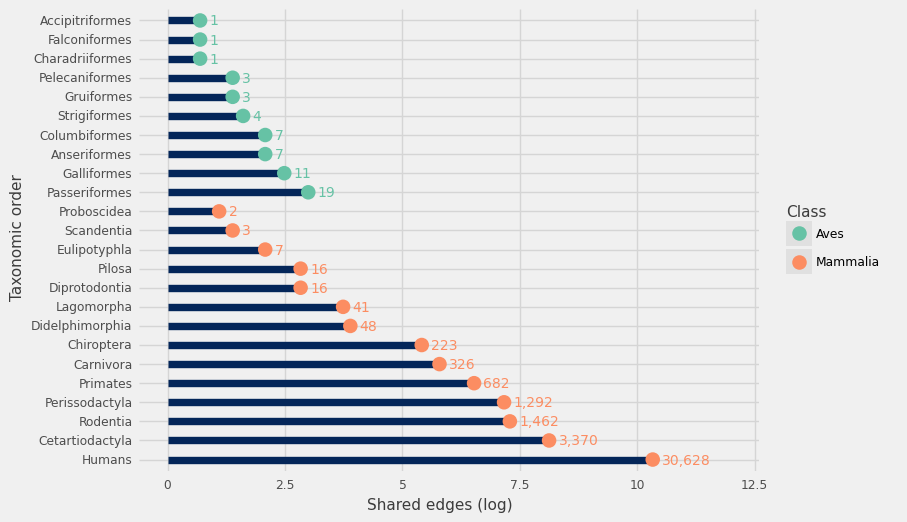

<ggplot: (129246464841)>

In [8]:
p = (ggplot()
 # Range strip
 + geom_segment(
     df,
     aes(x=0, xend='edges_ln', y='Order', yend='Order'),
     size=3,
     color='#042659'
 )
 # Age group markers
 + geom_point(
     df,
     aes('edges_ln', 'Order', color='Class', fill='Class'),
     size=4.5,
     stroke=0.7, 

 )
 
 + geom_text(
     df,
     aes(x='edges_ln+0.2', y='Order', label='edges_str', color='Class'),
     size=10,
     ha='left',
 )
 + scale_y_discrete(limits=mappings, reverse=False)
 + xlim(0,12)
 + xlab('Shared edges (log)')+ ylab('Taxonomic order')
 + theme_538()
 + scale_fill_manual(values=("#66c2a5", "#fc8d62", '#8da0cb'))
 + scale_color_manual(values=("#66c2a5", "#fc8d62", '#8da0cb'))
 + theme(figure_size=(8, 6))
)
ggsave(plot=p, filename='C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/Figure1_subplot.svg')
p

In [9]:
c_plot = pd.read_pickle('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/c_plot.pickle')

In [11]:
c_plot.head()

,viral_family,e_mean_k,e_std_k,d_mean_k,d_std_k,b_mean_k,b_std_k,e_mean_p,e_std_p,d_mean_p,d_std_p,b_mean_p,b_std_p
0,Adenoviridae,0.188218,0.197792,0.000118,0.000214,0.022284,0.027417,0.068107,0.053974,0.000153,0.000288,0.012067,0.012944
1,Arenaviridae,0.242962,0.243654,0.001672,0.002966,0.030854,0.031494,0.140517,0.132577,0.000923,0.001937,0.028902,0.029174
2,Arteriviridae,0.074713,0.023227,0.000074,0.000065,0.006294,0.002207,0.040328,0.017179,0.000026,0.000023,0.006424,0.002869
3,Asfarviridae,0.090038,NaN,0.000000,NaN,0.007266,NaN,0.092628,NaN,0.000188,NaN,0.009706,NaN
4,Astroviridae,0.047893,0.036179,0.000000,0.000000,0.003575,0.003091,0.054674,0.016066,0.000117,0.000187,0.009755,0.001948


In [12]:
fam = ['Filoviridae', 'Adenoviridae', 'Arenaviridae', 'Parvoviridae',
       'Coronaviridae', 'Picornaviridae', 'Flaviviridae', 'Herpesviridae',
       'Retroviridae', 'Astroviridae', 'Caliciviridae', 'Reoviridae',
       'Paramyxoviridae', 'Papillomaviridae', 'Picobirnaviridae',
       'Poxviridae', 'Polyomaviridae', 'Rhabdoviridae']
c_plot = c_plot[c_plot['viral_family'].isin(fam)]

In [13]:
c_plot.head()

,viral_family,e_mean_k,e_std_k,d_mean_k,d_std_k,b_mean_k,b_std_k,e_mean_p,e_std_p,d_mean_p,d_std_p,b_mean_p,b_std_p
0,Adenoviridae,0.188218,0.197792,0.000118,0.000214,0.022284,0.027417,0.068107,0.053974,0.000153,0.000288,0.012067,0.012944
1,Arenaviridae,0.242962,0.243654,0.001672,0.002966,0.030854,0.031494,0.140517,0.132577,0.000923,0.001937,0.028902,0.029174
4,Astroviridae,0.047893,0.036179,0.000000,0.000000,0.003575,0.003091,0.054674,0.016066,0.000117,0.000187,0.009755,0.001948
5,Caliciviridae,0.201149,0.286328,0.001849,0.003547,0.022345,0.032626,0.159893,0.215616,0.001834,0.002684,0.023725,0.033948
7,Coronaviridae,0.331691,0.248652,0.002361,0.003780,0.038741,0.031155,0.085574,0.101055,0.000720,0.002884,0.013954,0.013747


In [14]:
c_plot['dkl'] = c_plot['d_mean_k'] -1*c_plot['d_std_k']
c_plot['dkh'] = c_plot['d_mean_k'] +1*c_plot['d_std_k']

c_plot['dpl'] = c_plot['d_mean_p'] -1*c_plot['d_std_p']
c_plot['dph'] = c_plot['d_mean_p'] +1*c_plot['d_std_p']

<ipython-input-14-649a11f0f0a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-14-649a11f0f0a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-14-649a11f0f0a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-14-649a11f0f0a5>

C:\Users\falco\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_segment : Removed 1 rows containing missing values.


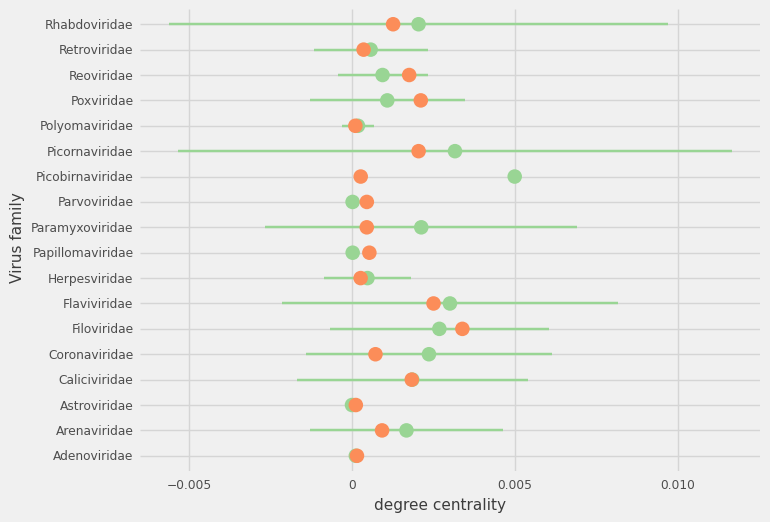

<ggplot: (129201606322)>

In [16]:
p = (
    ggplot()
    + geom_segment(c_plot,
                   aes(x='dkl', xend='dkh', y='viral_family', yend='viral_family'),
                   size=1,
                   color='#99d594')
    # Age group markers
    + geom_point(
        c_plot,
        aes('d_mean_k', 'viral_family',),
        size=4.5,
        stroke=0.7,
     color='#99d594', fill='#99d594'
    ) + geom_point(
        c_plot,
        aes('d_mean_p', 'viral_family'),
        size=4.5,
        stroke=0.7,
        color='#fc8d59', fill='#fc8d59'
    )

    +xlab('degree centrality') + ylab('Virus family') + theme_538() +
    #scale_fill_manual(values=("#66c2a5", "#fc8d62", '#8da0cb')) +
    #scale_color_manual(values=("#66c2a5", "#fc8d62", '#8da0cb')) +
    theme(figure_size=(8, 6)))
p
#ggsave(
#    plot=p,
#    filename=
#    'C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/degree_change.svg'
#)

In [17]:
c_plot.head()

,viral_family,e_mean_k,e_std_k,d_mean_k,d_std_k,b_mean_k,b_std_k,e_mean_p,e_std_p,d_mean_p,d_std_p,b_mean_p,b_std_p,dkl,dkh,dpl,dph
0,Adenoviridae,0.188218,0.197792,0.000118,0.000214,0.022284,0.027417,0.068107,0.053974,0.000153,0.000288,0.012067,0.012944,-0.000096,0.000332,-0.000135,0.000440
1,Arenaviridae,0.242962,0.243654,0.001672,0.002966,0.030854,0.031494,0.140517,0.132577,0.000923,0.001937,0.028902,0.029174,-0.001295,0.004638,-0.001014,0.002860
4,Astroviridae,0.047893,0.036179,0.000000,0.000000,0.003575,0.003091,0.054674,0.016066,0.000117,0.000187,0.009755,0.001948,0.000000,0.000000,-0.000070,0.000305
5,Caliciviridae,0.201149,0.286328,0.001849,0.003547,0.022345,0.032626,0.159893,0.215616,0.001834,0.002684,0.023725,0.033948,-0.001698,0.005396,-0.000850,0.004518
7,Coronaviridae,0.331691,0.248652,0.002361,0.003780,0.038741,0.031155,0.085574,0.101055,0.000720,0.002884,0.013954,0.013747,-0.001419,0.006142,-0.002163,0.003604


C:\Users\falco\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6 x 4 in image.
C:\Users\falco\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/degree_change.svg


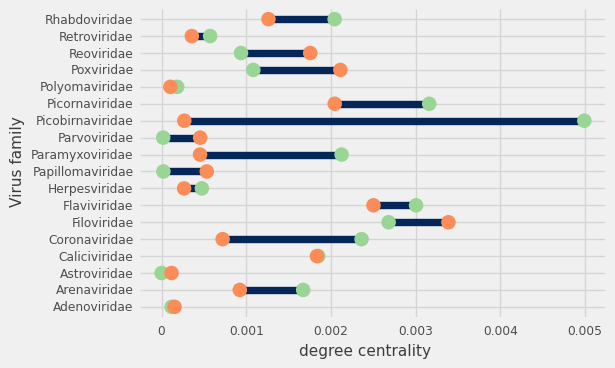

<ggplot: (129201667515)>

In [18]:
p = (
    ggplot()
    + geom_segment(c_plot,
                   aes(x='d_mean_k', xend='d_mean_p', y='viral_family', yend='viral_family'),
                   size=3,
                   color='#042659')
    + geom_point(
        c_plot,
        aes('d_mean_k', 'viral_family',),
        size=4.5,
        stroke=0.7,
     color='#99d594', fill='#99d594',
    ) + geom_point(
        c_plot,
        aes('d_mean_p', 'viral_family',),
        size=4.5,
        stroke=0.7,
        color='#fc8d59', fill='#fc8d59',
    ) +xlab('degree centrality') + ylab('Virus family') + theme_538() +
    theme(figure_size=(6, 4)))
ggsave(
    plot=p,
    filename=
    'C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/degree_change.svg'
)
p

C:\Users\falco\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6 x 4 in image.
C:\Users\falco\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/Eigenvector_change.svg


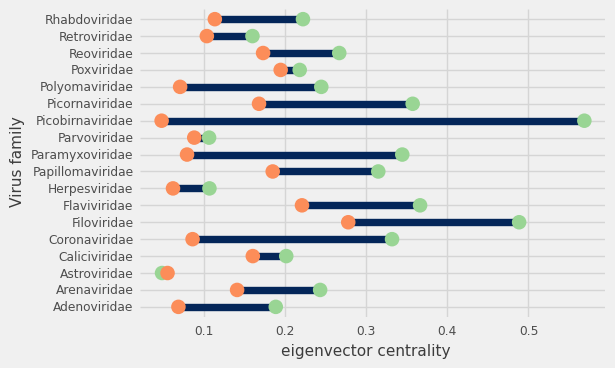

<ggplot: (129201937020)>

In [19]:
p = (
    ggplot()
    + geom_segment(c_plot,
                   aes(x='e_mean_k', xend='e_mean_p', y='viral_family', yend='viral_family'),
                   size=3,
                   color='#042659')
    + geom_point(
        c_plot,
        aes('e_mean_k', 'viral_family',),
        size=4.5,
        stroke=0.7,
     color='#99d594', fill='#99d594'
    ) + geom_point(
        c_plot,
        aes('e_mean_p', 'viral_family'),
        size=4.5,
        stroke=0.7,
        color='#fc8d59', fill='#fc8d59'
    )

    +xlab('eigenvector centrality') + ylab('Virus family') + theme_538() +
    theme(figure_size=(6, 4)))

ggsave(
    plot=p,
    filename=
    'C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/Eigenvector_change.svg'
)
p

C:\Users\falco\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6 x 4 in image.
C:\Users\falco\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/BetweenNess_change.svg


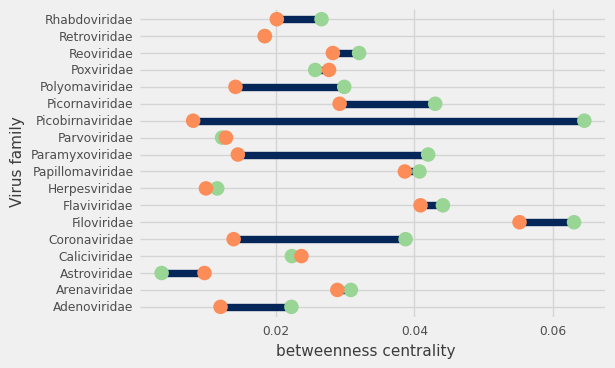

<ggplot: (129202513595)>

In [20]:
p = (
    ggplot()
    + geom_segment(c_plot,
                   aes(x='b_mean_k', xend='b_mean_p', y='viral_family', yend='viral_family'),
                   size=3,
                   color='#042659')
    + geom_point(
        c_plot,
        aes('b_mean_k', 'viral_family',),
        size=4.5,
        stroke=0.7,
     color='#99d594', fill='#99d594'
    ) + geom_point(
        c_plot,
        aes('b_mean_p', 'viral_family'),
        size=4.5,
        stroke=0.7,
        color='#fc8d59', fill='#fc8d59'
    )

    +xlab('betweenness centrality') + ylab('Virus family') + theme_538() +
    theme(figure_size=(6, 4)))

ggsave(
    plot=p,
    filename=
    'C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/BetweenNess_change.svg'
)
p

In [21]:
known_nx_df = pd.read_pickle('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/known_nx_df.pickle')
predicted_network = pd.read_pickle('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/predicted_network.pickle')

In [22]:
nx_df = pd.concat([known_nx_df, predicted_network], axis=0)
nx_df.head()

,index,degree,closeness_centrality,betweenness_centrality,eigenvector_centrality,load_centrality,clustering,Network,virus_name,viral_family
0,Adelaide River ephemerovirus,0.116858,0.484723,0.0,0.008633,0.0,1.0,known_network,Adelaide River ephemerovirus,Rhabdoviridae
1,Adeno-associated dependoparvovirus A,0.473180,0.632691,0.0,0.062847,0.0,1.0,known_network,Adeno-associated dependoparvovirus A,Parvoviridae
2,Adeno-associated dependoparvovirus B,0.473180,0.632691,0.0,0.062847,0.0,1.0,known_network,Adeno-associated dependoparvovirus B,Parvoviridae
3,African green monkey polyomavirus,0.019157,0.423279,0.0,0.001822,0.0,1.0,known_network,African green monkey polyomavirus,Not_Assinged
4,African swine fever virus,0.090038,0.473272,0.0,0.007266,0.0,1.0,known_network,African swine fever virus,Asfarviridae


In [23]:
import matplotlib.style as style
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Times New Roman'
sns.set_context("paper", font_scale=1.30, rc={"lines.linewidth": 0.8})

In [24]:
nx_df.Network.unique()

array(['known_network', 'predicted_network'], dtype=object)

In [25]:
import seaborn as sns
pal = sns.color_palette('muted')
species_c = pal[0]
genus_c= pal[1]
family_c = pal[2]
order_c= pal[3]
palette="Blues"
c = '#2b8cbe'
a = 0.7
lw = 0.8
w = 0.3

In [26]:
nx_df.viral_family.unique()

array(['Rhabdoviridae', 'Parvoviridae', 'Not_Assinged', 'Asfarviridae',
       'Picornaviridae', 'Herpesviridae', 'Arenaviridae', 'Arteriviridae',
       'Coronaviridae', 'Papillomaviridae', 'Hantaviridae',
       'Peribunyaviridae', 'Flaviviridae', 'Paramyxoviridae',
       'Reoviridae', 'Togaviridae', 'Polyomaviridae', 'Adenoviridae',
       'Retroviridae', 'Pneumoviridae', 'Poxviridae', 'Tobaniviridae',
       'Phenuiviridae', 'Filoviridae', 'Nairoviridae', 'Orthomyxoviridae',
       'Caliciviridae', 'Hepadnaviridae', 'Picobirnaviridae',
       'Astroviridae', 'Circoviridae', 'Novel'], dtype=object)

In [27]:
nx_df_plot = nx_df[nx_df.viral_family.isin(fam)]

In [28]:
nx_df_plot.head()

,index,degree,closeness_centrality,betweenness_centrality,eigenvector_centrality,load_centrality,clustering,Network,virus_name,viral_family
0,Adelaide River ephemerovirus,0.116858,0.484723,0.000000,0.008633,0.000000,1.000000,known_network,Adelaide River ephemerovirus,Rhabdoviridae
1,Adeno-associated dependoparvovirus A,0.473180,0.632691,0.000000,0.062847,0.000000,1.000000,known_network,Adeno-associated dependoparvovirus A,Parvoviridae
2,Adeno-associated dependoparvovirus B,0.473180,0.632691,0.000000,0.062847,0.000000,1.000000,known_network,Adeno-associated dependoparvovirus B,Parvoviridae
5,Aichivirus A,0.473180,0.632691,0.000000,0.062847,0.000000,1.000000,known_network,Aichivirus A,Picornaviridae
6,Alagoas vesiculovirus,0.189655,0.510451,0.000535,0.014623,0.000559,0.701093,known_network,Alagoas vesiculovirus,Rhabdoviridae


In [29]:
nx_df_plot.Network.unique()

array(['known_network', 'predicted_network'], dtype=object)

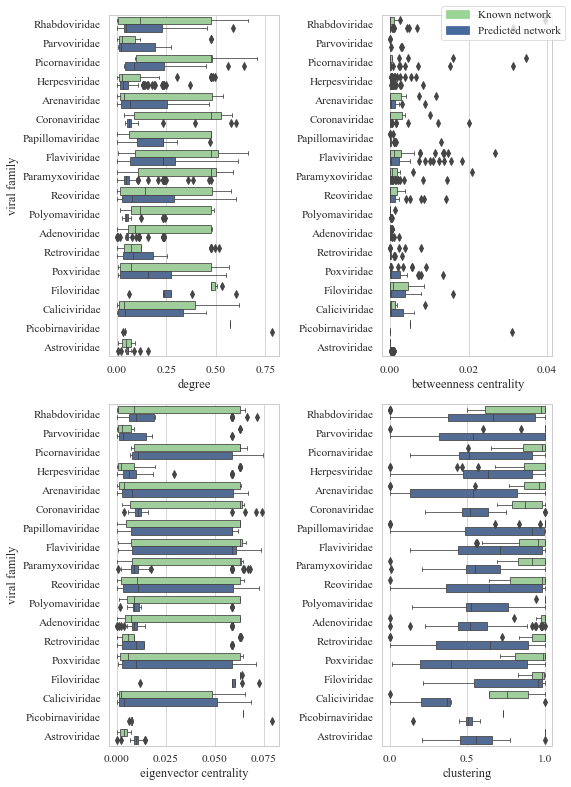

In [31]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

palette ={"known_network":"#99d594","predicted_network":"#476a9e"}
pal = ["#99d594", "#042659"]
#cmap = cmap(flatui)
#sns.set_palette(pal)
f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize = (8, 11), sharey= False)
#palette="Blues"
c = '#2b8cbe'
a = 0.7
lw = 3
w = 0.8
sns.boxplot(x="degree", y= 'viral_family', hue='Network', data= nx_df_plot, ax= ax1, palette=palette, width = w )
#sns.stripplot(x="degree", y= 'viral_family', hue='Network', data=nx_df_plot, size=2, jitter=True, alpha  = a, linewidth=lw, ax= ax1, palette=palette)

sns.boxplot(x="betweenness_centrality", y= 'viral_family', hue='Network', data= nx_df_plot, ax= ax2, palette=palette, width = w)
#sns.stripplot(x="betweenness_centrality", y= 'viral_family', hue='Network', data=nx_df_plot, size=2, jitter=True, alpha  = a, linewidth=lw, ax= ax2, palette=palette)
ax2.set_xlabel('betweenness centrality')

sns.boxplot(x="eigenvector_centrality", y= 'viral_family', hue='Network', data= nx_df_plot, ax= ax3, palette=palette, width = w)
#sns.stripplot(x="eigenvector_centrality", y= 'viral_family', hue='Network', data=nx_df_plot, size=2, jitter=True, alpha  = a, linewidth=lw, ax= ax3, palette=palette)
ax3.set_xlabel('eigenvector centrality')

sns.boxplot(x="clustering", y= 'viral_family', hue='Network', data= nx_df_plot, ax= ax4, palette=palette, width = w)
#sns.stripplot(x="clustering", y= 'viral_family', hue='Network', data=nx_df_plot, size=2, jitter=True, alpha  = a, linewidth=lw, ax= ax4, palette=palette)

ax1.set_ylabel('viral family')
ax2.yaxis.label.set_visible(False)
ax3.set_ylabel('viral family')
ax4.yaxis.label.set_visible(False)
#ax1.set_xscale('log')
#ax2.set_xscale('log')
#ax3.set_xscale('log')
#ax4.set_xscale('log')

ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()
ax4.get_legend().remove()

legend_elements = [Patch(facecolor='#99d594', edgecolor='#99d594',label='Known network'), 
                   Patch(facecolor='#476a9e', edgecolor='#476a9e',label='Predicted network')]

# Create the figure
f.legend(handles=legend_elements,)
plt.tight_layout()
plt.savefig('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/Prediction_centrality_comparisons.png', dpi = 600)
plt.savefig('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/Prediction_centrality_comparisons.svg', dpi = 600)
plt.savefig('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/Prediction_centrality_comparisons.pdf', dpi = 600)
plt.show()

In [32]:
color_map = {u'Adenoviridae': u'#66c2a5',
 u'Arenaviridae': u'#8da0cb',
 u'Arteriviridae': u'#fc8d62',
 u'Asfarviridae': u'#8da0cb',
 u'Astroviridae': u'#8da0cb',
 u'Caliciviridae': u'#a6d854',
 u'Circoviridae': u'#a6d854',
 u'Coronaviridae': u'#fc8d62',
 u'Filoviridae': u'#e5c494',
 u'Flaviviridae': u'#fc8d62',
 u'Hantaviridae': u'#e5c494',
 u'Hepadnaviridae': u'#b3b3b3',
 u'Herpesviridae': u'#e78ac3',
 u'Nairoviridae': u'#ffd92f',
 u'Not_Assinged': u'#e78ac3',
 u'Orthomyxoviridae': u'#ffd92f',
 u'Papillomaviridae': u'#a6d854',
 u'Paramyxoviridae': u'#ffd92f',
 u'Parvoviridae': u'#b3b3b3',
 u'Peribunyaviridae': u'#8da0cb',
 u'Phenuiviridae': u'#66c2a5',
 u'Picobirnaviridae': u'#e5c494',
 u'Picornaviridae': u'#e78ac3',
 u'Pneumoviridae': u'#b3b3b3',
 u'Polyomaviridae': u'#ffd92f',
 u'Poxviridae': u'#fc8d62',
 u'Reoviridae': u'#66c2a5',
 u'Retroviridae': u'#66c2a5',
 u'Rhabdoviridae': u'#e5c494',
 u'Tobaniviridae': u'#e78ac3',
 u'Togaviridae': u'#a6d854'}

color_map = dict(zip(nx_df_plot.viral_family.unique().tolist(), 
                  sns.color_palette("Paired", n_colors=len(nx_df_plot.viral_family.unique().tolist())).as_hex()))

nx_df_plot['color'] = nx_df_plot['viral_family'].map(color_map)
nx_df_plot.head()

<ipython-input-32-2f36aabeb29b>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index,degree,closeness_centrality,betweenness_centrality,eigenvector_centrality,load_centrality,clustering,Network,virus_name,viral_family,color
0,Adelaide River ephemerovirus,0.116858,0.484723,0.000000,0.008633,0.000000,1.000000,known_network,Adelaide River ephemerovirus,Rhabdoviridae,#a6cee3
1,Adeno-associated dependoparvovirus A,0.473180,0.632691,0.000000,0.062847,0.000000,1.000000,known_network,Adeno-associated dependoparvovirus A,Parvoviridae,#1f78b4
2,Adeno-associated dependoparvovirus B,0.473180,0.632691,0.000000,0.062847,0.000000,1.000000,known_network,Adeno-associated dependoparvovirus B,Parvoviridae,#1f78b4
5,Aichivirus A,0.473180,0.632691,0.000000,0.062847,0.000000,1.000000,known_network,Aichivirus A,Picornaviridae,#b2df8a
6,Alagoas vesiculovirus,0.189655,0.510451,0.000535,0.014623,0.000559,0.701093,known_network,Alagoas vesiculovirus,Rhabdoviridae,#a6cee3


In [33]:
color_map

{'Rhabdoviridae': '#a6cee3',
 'Parvoviridae': '#1f78b4',
 'Picornaviridae': '#b2df8a',
 'Herpesviridae': '#33a02c',
 'Arenaviridae': '#fb9a99',
 'Coronaviridae': '#e31a1c',
 'Papillomaviridae': '#fdbf6f',
 'Flaviviridae': '#ff7f00',
 'Paramyxoviridae': '#cab2d6',
 'Reoviridae': '#6a3d9a',
 'Polyomaviridae': '#ffff99',
 'Adenoviridae': '#b15928',
 'Retroviridae': '#a6cee3',
 'Poxviridae': '#1f78b4',
 'Filoviridae': '#b2df8a',
 'Caliciviridae': '#33a02c',
 'Picobirnaviridae': '#fb9a99',
 'Astroviridae': '#e31a1c'}

In [34]:
nx_df_plot.viral_family.unique()

array(['Rhabdoviridae', 'Parvoviridae', 'Picornaviridae', 'Herpesviridae',
       'Arenaviridae', 'Coronaviridae', 'Papillomaviridae',
       'Flaviviridae', 'Paramyxoviridae', 'Reoviridae', 'Polyomaviridae',
       'Adenoviridae', 'Retroviridae', 'Poxviridae', 'Filoviridae',
       'Caliciviridae', 'Picobirnaviridae', 'Astroviridae'], dtype=object)

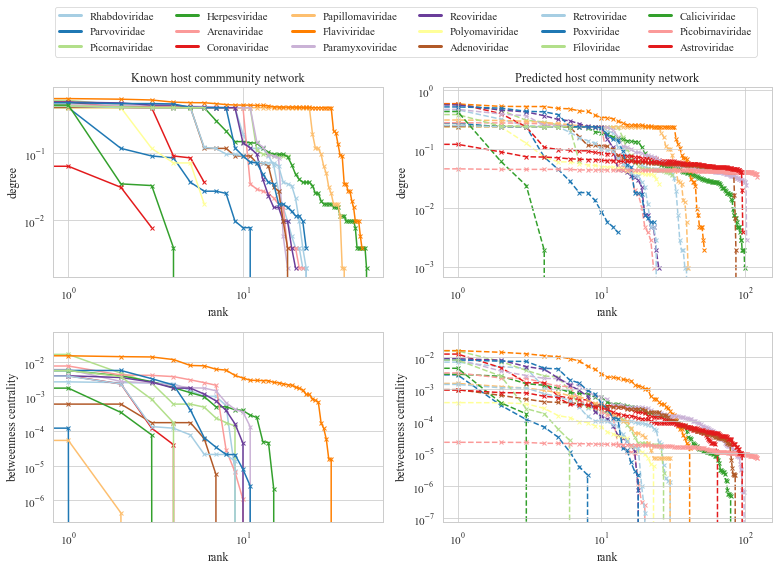

In [35]:
font_s = 12
f, ((ax1, ax2),(ax3, ax4))  = plt.subplots(2, 2, figsize = (11, 8), sharex= False)

for v_f in nx_df_plot.viral_family.unique():
    temp_df_k = nx_df_plot[(nx_df_plot.viral_family == v_f) & (nx_df_plot.Network == 'known_network') ]
    temp_df_p = nx_df_plot[(nx_df_plot.viral_family == v_f) & (nx_df_plot.Network == 'predicted_network') ]
    degree_sequence_k = sorted(temp_df_k.degree.tolist(), reverse=True)
    degree_sequence_p = sorted(temp_df_p.degree.tolist(), reverse=True)
    dmax = max(degree_sequence_k)
    ax1.loglog(degree_sequence_k, color = temp_df_k.color.unique()[0], marker='x', zorder=1,linewidth = 1.5)
    ax2.loglog(degree_sequence_p, color = temp_df_p.color.unique()[0], marker='x', zorder=0,linewidth = 1.5, linestyle="--")
ax1.set_ylabel("degree", fontsize = font_s )
ax1.set_xlabel("rank", fontsize = font_s )
ax2.set_ylabel("degree", fontsize = font_s )
ax2.set_xlabel("rank", fontsize = font_s )

for v_f in nx_df_plot.viral_family.unique():
    temp_df_k = nx_df_plot[(nx_df_plot.viral_family == v_f) & (nx_df_plot.Network == 'known_network') ]
    temp_df_p = nx_df_plot[(nx_df_plot.viral_family == v_f) & (nx_df_plot.Network == 'predicted_network') ]
    between_sequence_k = sorted(temp_df_k.betweenness_centrality.tolist(), reverse=True)
    between_sequence_p = sorted(temp_df_p.betweenness_centrality.tolist(), reverse=True)
    dmax = max(between_sequence_k)
    ax3.loglog(between_sequence_k, color = temp_df_k.color.unique()[0], marker='x', zorder=1,linewidth = 1.5)
    ax4.loglog(between_sequence_p, color = temp_df_p.color.unique()[0], marker='x', zorder=0,linewidth = 1.5, linestyle="--")
ax3.set_ylabel("betweenness centrality", fontsize = font_s )
ax3.set_xlabel("rank", fontsize = font_s )
ax4.set_ylabel("betweenness centrality", fontsize = font_s )
ax4.set_xlabel("rank", fontsize = font_s )

ax1.set_title('Known host commmunity network')
ax2.set_title('Predicted host commmunity network')
markers = [plt.Line2D([0,0],[0,0],color=color, linestyle='-', linewidth=3) for color in color_map.values()]
lgd = f.legend(markers, color_map.keys(), numpoints=1, loc='upper center', bbox_to_anchor=(0.52,1), ncol =6, fontsize=11)
plt.tight_layout(rect=[0, 0.0, 1, 0.9])
plt.savefig('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/log_log_plot.png', 
           dpi = 600)
plt.savefig('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/log_log_plot.svg', 
           dpi = 600)
plt.savefig('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/log_log_plot.pdf', 
           dpi = 600)
plt.show()

In [36]:
for v_f in nx_df_plot.viral_family.unique():
    print(v_f)

Rhabdoviridae
Parvoviridae
Picornaviridae
Herpesviridae
Arenaviridae
Coronaviridae
Papillomaviridae
Flaviviridae
Paramyxoviridae
Reoviridae
Polyomaviridae
Adenoviridae
Retroviridae
Poxviridae
Filoviridae
Caliciviridae
Picobirnaviridae
Astroviridae


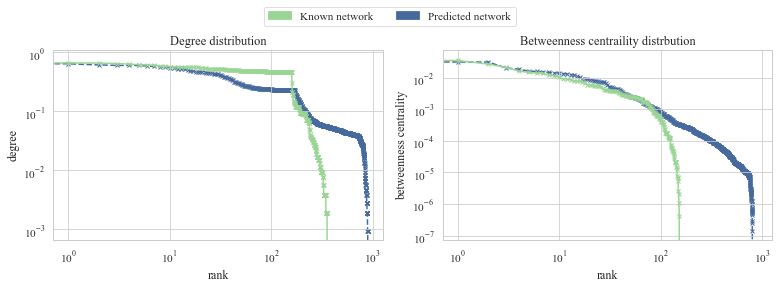

In [37]:
font_s = 12
f, (ax1, ax2)  = plt.subplots(1, 2, figsize = (11, 4), sharex= False)

temp_df_k = nx_df_plot[nx_df_plot.Network == 'known_network']
temp_df_p = nx_df_plot[nx_df_plot.Network == 'predicted_network']
degree_sequence_k = sorted(temp_df_k.degree.tolist(), reverse=True)
degree_sequence_p = sorted(temp_df_p.degree.tolist(), reverse=True)
ax1.loglog(degree_sequence_k, color = '#99d594', marker='x', zorder=1,linewidth = 1.5)
ax1.loglog(degree_sequence_p, color = '#476a9e', marker='x', zorder=0,linewidth = 1.5, linestyle="--")
ax1.set_ylabel("degree", fontsize = font_s )
ax1.set_xlabel("rank", fontsize = font_s )


between_sequence_k = sorted(temp_df_k.betweenness_centrality.tolist(), reverse=True)
between_sequence_p = sorted(temp_df_p.betweenness_centrality.tolist(), reverse=True)

ax2.loglog(between_sequence_k, color = '#99d594', marker='x', zorder=1,linewidth = 1.5)
ax2.loglog(between_sequence_p, color = '#476a9e', marker='x', zorder=0,linewidth = 1.5, linestyle="--")

ax2.set_ylabel("betweenness centrality", fontsize = font_s )
ax2.set_xlabel("rank", fontsize = font_s )
ax1.set_title('Degree distribution')
ax2.set_title('Betweenness centraility distrbution')

legend_elements = [Patch(facecolor='#99d594', edgecolor='#99d594',label='Known network'), 
                   Patch(facecolor='#476a9e', edgecolor='#476a9e',label='Predicted network')]

# Create the figure
f.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5,1.022), ncol = 2)
plt.tight_layout(rect=[0, 0.0, 1, 0.95])
plt.savefig('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/Prediction_centrality_log_overall_comparisons.png', dpi = 600)
plt.savefig('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/Prediction_centrality_log_overall_comparisons.svg', dpi = 600)
plt.savefig('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/Prediction_centrality_log_overall_comparisons.pdf', dpi = 600)

plt.show()

In [38]:
from scipy import stats
stats.ks_2samp(degree_sequence_k, degree_sequence_p)

KstestResult(statistic=0.41731349851483335, pvalue=2.271036299904592e-41)

In [39]:
stats.kstest(degree_sequence_p, "powerlaw", N=len(degree_sequence_p))

TypeError: _parse_args() missing 1 required positional argument: 'a'

In [40]:
stats.ks_2samp(between_sequence_k, between_sequence_p)

KstestResult(statistic=0.4712501069564473, pvalue=2.7023606016782803e-53)

In [41]:
?stats.kstest

In [44]:
import powerlaw

predicted_powerlaw = powerlaw.Fit(degree_sequence_p)
print (predicted_powerlaw.power_law.alpha)
print (predicted_powerlaw.power_law.xmin)
R, p = predicted_powerlaw.distribution_compare('power_law', 'lognormal')
print(R)
print(p)
predicted_powerlaw.power_law.D

6.118441723110316
0.41871455576559546
-1.5940479585581184
0.3050778569953192


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
C:\Users\falco\anaconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide


0.11842327740999492

In [45]:
known_powerlaw = powerlaw.Fit(degree_sequence_k)
print (known_powerlaw.power_law.alpha)
print (known_powerlaw.power_law.xmin)
R, p = known_powerlaw.distribution_compare('power_law', 'lognormal')
print(R)
print(p)
known_powerlaw.power_law.D

11.961967125653329
0.4789272030651341
0.0005772826313845403
0.954669816926619


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


0.08704751292079985

## running regression on predicted network

In [46]:
predicted_network.head()

,index,degree,closeness_centrality,betweenness_centrality,eigenvector_centrality,load_centrality,clustering,Network,virus_name,viral_family
0,Adelaide River ephemerovirus,0.102079,0.507258,0.000079,0.011632,0.000083,0.660090,predicted_network,Adelaide River ephemerovirus,Rhabdoviridae
1,Adeno-associated dependoparvovirus A,0.233459,0.555791,0.000000,0.058568,0.000000,1.000000,predicted_network,Adeno-associated dependoparvovirus A,Parvoviridae
2,Adeno-associated dependoparvovirus B,0.233459,0.555791,0.000000,0.058568,0.000000,1.000000,predicted_network,Adeno-associated dependoparvovirus B,Parvoviridae
3,African green monkey polyomavirus,0.009452,0.421399,0.000000,0.001677,0.000000,1.000000,predicted_network,African green monkey polyomavirus,Not_Assinged
4,African swine fever virus,0.092628,0.504520,0.000188,0.009706,0.000198,0.462866,predicted_network,African swine fever virus,Asfarviridae


In [47]:
P_data = pd.read_csv('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/data/network_prediction_data.csv', low_memory=False)
P_data['ScientificName'] = P_data['ScientificNameToLowestKnownRank']
P_data.ScientificNameToLowestKnownRank.replace('piliocolobus tholloni', 'Piliocolobus tholloni', inplace = True)
P_data['Order'] = P_data.Order.str.upper()
P_data.replace('ARTIODACTYLA', 'CETARTIODACTYLA', inplace=True)
uncertain = ['field ID certainty unknown', 'unidentified by barcoding - field ID uncertain']
P_data_new_certain = P_data[(P_data.VirusStatus == 'new') &(P_data.Order !='HUMANS') & (~P_data.IDCertainty.isin(uncertain))]
P = (P_data_new_certain.groupby(['VirusGroup', 'ViralFamily', 'VirusStatus']).agg({'ScientificName':'unique',
                                                                       'Order':'unique'})).reset_index()
P['PubMed'] = P['ScientificName'].str.len()
P = P[P.ViralFamily!='Bunyaviridae']
P.ViralFamily.replace('Novel', 'Caliciviridae', inplace = True)
Orders = P.Order.apply(pd.Series)
Orders.columns = ['O1', 'O2']
Orders.O1.fillna(Orders.O2, inplace=True)
P = pd.concat([P, Orders], axis=1)
print(P.shape)
P.head()

(944, 8)


,VirusGroup,ViralFamily,VirusStatus,ScientificName,Order,PubMed,O1,O2
0,Bombali Virus (BOMV),Filoviridae,new,"[Mops condylurus, Chaerephon pumilus]",[CHIROPTERA],2,CHIROPTERA,NaN
1,PREDICT_AaV-1,Adenoviridae,new,[Macaca mulatta],[PRIMATES],1,PRIMATES,NaN
2,PREDICT_AaV-10,Adenoviridae,new,[Macaca mulatta],[PRIMATES],1,PRIMATES,NaN
3,PREDICT_AaV-11,Adenoviridae,new,[Macaca mulatta],[PRIMATES],1,PRIMATES,NaN
4,PREDICT_AaV-2,Adenoviridae,new,[Macaca mulatta],[PRIMATES],1,PRIMATES,NaN


In [48]:
P = pd.merge(P, predicted_network, left_on='VirusGroup', right_on='virus_name', how='left')
print(P.shape)
P.head()

(944, 18)


,VirusGroup,ViralFamily,VirusStatus,ScientificName,Order,PubMed,O1,O2,index,degree,closeness_centrality,betweenness_centrality,eigenvector_centrality,load_centrality,clustering,Network,virus_name,viral_family
0,Bombali Virus (BOMV),Filoviridae,new,"[Mops condylurus, Chaerephon pumilus]",[CHIROPTERA],2,CHIROPTERA,NaN,Bombali Virus (BOMV),0.060491,0.499617,0.000173,0.011888,0.000165,0.580853,predicted_network,Bombali Virus (BOMV),Filoviridae
1,PREDICT_AaV-1,Adenoviridae,new,[Macaca mulatta],[PRIMATES],1,PRIMATES,NaN,PREDICT_AaV-1,0.051040,0.487536,0.000044,0.008032,0.000040,0.436059,predicted_network,PREDICT_AaV-1,Adenoviridae
2,PREDICT_AaV-10,Adenoviridae,new,[Macaca mulatta],[PRIMATES],1,PRIMATES,NaN,PREDICT_AaV-10,0.052930,0.487305,0.000039,0.008679,0.000036,0.453896,predicted_network,PREDICT_AaV-10,Adenoviridae
3,PREDICT_AaV-11,Adenoviridae,new,[Macaca mulatta],[PRIMATES],1,PRIMATES,NaN,PREDICT_AaV-11,0.053875,0.489625,0.000051,0.009129,0.000049,0.445489,predicted_network,PREDICT_AaV-11,Adenoviridae
4,PREDICT_AaV-2,Adenoviridae,new,[Macaca mulatta],[PRIMATES],1,PRIMATES,NaN,PREDICT_AaV-2,0.053875,0.487998,0.000048,0.009116,0.000045,0.449248,predicted_network,PREDICT_AaV-2,Adenoviridae


In [49]:
P = P[P['O1'].notna()]
P.shape

(934, 18)

In [50]:
P = P[P['degree'].notna()]
P.shape

(535, 18)

In [51]:
%%time
def run_permutation_test(dependent, h1, number_of_permutations):
    
    h1['degree_dist'] = h1.degree / float(h1.degree.max())

    equation = dependent + "~ C(ViralFamily) + PubMed+ C(O1)"
    from statsmodels.genmod.generalized_estimating_equations import GEE
    from statsmodels.genmod.cov_struct import (Exchangeable, Independence,
                                               Autoregressive)
    from statsmodels.genmod.families import Poisson
    import statsmodels.formula.api as smf
    fam = Poisson()
    ind = Independence()

    model = smf.ols(formula=equation, data=h1)
    #model = GEE.from_formula(equation,  data = h1, cov_struct=ind, family=fam)
    main_model_result = model.fit()
    main_result = pd.DataFrame(main_model_result.params)
    print(main_result)
    main_result = main_result.T

    random_coeff = []
    for i in range(number_of_permutations):
        rand_h1 = h1.copy()
        rand_h1[dependent] = np.random.permutation(h1[dependent])
        fam = Poisson()
        ind = Independence()
        model = model = smf.ols(formula=equation, data=rand_h1)
        result = model.fit()
        random_coeff.append(pd.DataFrame(result.params))
    perm_results = pd.concat(random_coeff, axis=1).T
    
    fig, ax = plt.subplots(nrows=8, ncols=3, figsize=(8, 11))
    for i, ax in enumerate(fig.axes):
        perm_results[perm_results.columns[i]].hist(ax=ax, bins=100)
        ax.axvline(x=main_result[perm_results.columns[i]].values[0],
                   color='#fc9272')
        p = (perm_results[perm_results.columns[i]] >
             main_result[perm_results.columns[i]].values[0]
             ).sum() / float(number_of_permutations)
        if p > 0.5:
            p = 1 - p
        else:
            p = p
        title = perm_results.columns[i] + ' p=' + '{0:.2f}'.format(p)
        ax.set_title(title, fontsize=7)
    
    plt.tight_layout()
    plt.savefig(
        'C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/'
        + dependent + '_permutations_PREDICT_virus.png',
        dpi=600)
    plt.show()

Wall time: 0 ns


                                           0
Intercept                           0.066853
C(ViralFamily)[T.Arenaviridae]      0.002274
C(ViralFamily)[T.Astroviridae]      0.002840
C(ViralFamily)[T.Caliciviridae]     0.011994
C(ViralFamily)[T.Coronaviridae]     0.011142
C(ViralFamily)[T.Filoviridae]       0.009470
C(ViralFamily)[T.Flaviviridae]      0.003215
C(ViralFamily)[T.Herpesviridae]    -0.014476
C(ViralFamily)[T.Papillomaviridae] -0.007855
C(ViralFamily)[T.Paramyxoviridae]  -0.005955
C(ViralFamily)[T.Parvoviridae]     -0.005964
C(ViralFamily)[T.Picobirnaviridae] -0.009073
C(ViralFamily)[T.Picornaviridae]   -0.007573
C(ViralFamily)[T.Polyomaviridae]   -0.004019
C(ViralFamily)[T.Reoviridae]       -0.013780
C(ViralFamily)[T.Retroviridae]      0.005378
C(ViralFamily)[T.Rhabdoviridae]    -0.002002
C(O1)[T.CETARTIODACTYLA]           -0.016063
C(O1)[T.CHIROPTERA]                -0.016082
C(O1)[T.EULIPOTYPHLA]              -0.014821
C(O1)[T.GALLIFORMES]               -0.017628
C(O1)[T.PR

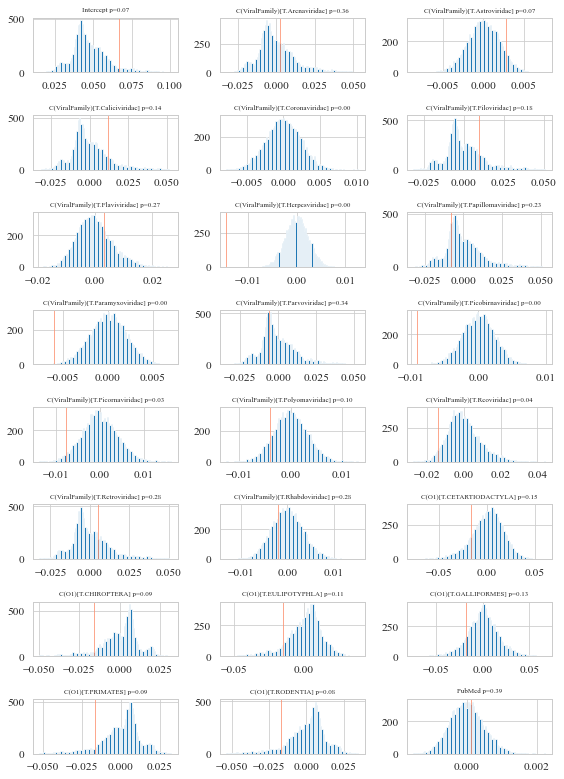

Wall time: 2min 5s


In [52]:
%%time
run_permutation_test(dependent = 'degree', h1 = P, number_of_permutations = 10000)

                                               0
Intercept                           1.333749e-05
C(ViralFamily)[T.Arenaviridae]      3.172720e-05
C(ViralFamily)[T.Astroviridae]      1.239085e-05
C(ViralFamily)[T.Caliciviridae]     1.724126e-04
C(ViralFamily)[T.Coronaviridae]     7.854474e-05
C(ViralFamily)[T.Filoviridae]       8.064156e-05
C(ViralFamily)[T.Flaviviridae]      6.016747e-04
C(ViralFamily)[T.Herpesviridae]    -1.760430e-05
C(ViralFamily)[T.Papillomaviridae]  2.824691e-05
C(ViralFamily)[T.Paramyxoviridae]   4.287308e-06
C(ViralFamily)[T.Parvoviridae]      3.682243e-05
C(ViralFamily)[T.Picobirnaviridae] -6.300946e-05
C(ViralFamily)[T.Picornaviridae]   -2.631250e-05
C(ViralFamily)[T.Polyomaviridae]    1.934577e-07
C(ViralFamily)[T.Reoviridae]       -5.077512e-05
C(ViralFamily)[T.Retroviridae]     -3.618046e-05
C(ViralFamily)[T.Rhabdoviridae]    -2.076083e-05
C(O1)[T.CETARTIODACTYLA]            4.141755e-05
C(O1)[T.CHIROPTERA]                 6.973484e-05
C(O1)[T.EULIPOTYPHLA

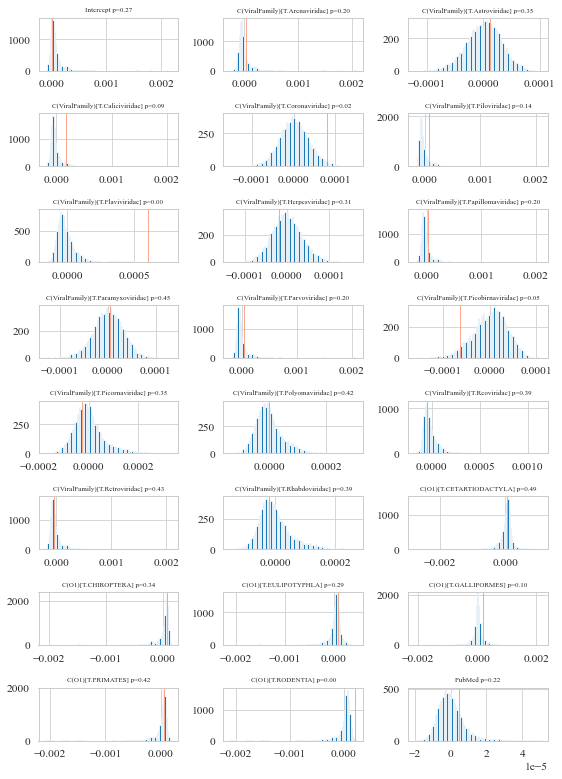

Wall time: 2min 5s


In [53]:
%%time
run_permutation_test(dependent = 'betweenness_centrality', h1 = P, number_of_permutations = 10000)

                                           0
Intercept                           0.013808
C(ViralFamily)[T.Arenaviridae]      0.001499
C(ViralFamily)[T.Astroviridae]      0.000919
C(ViralFamily)[T.Caliciviridae]     0.001518
C(ViralFamily)[T.Coronaviridae]     0.002043
C(ViralFamily)[T.Filoviridae]       0.002977
C(ViralFamily)[T.Flaviviridae]      0.000247
C(ViralFamily)[T.Herpesviridae]    -0.001699
C(ViralFamily)[T.Papillomaviridae] -0.001397
C(ViralFamily)[T.Paramyxoviridae]  -0.000738
C(ViralFamily)[T.Parvoviridae]     -0.000797
C(ViralFamily)[T.Picobirnaviridae] -0.001307
C(ViralFamily)[T.Picornaviridae]   -0.000454
C(ViralFamily)[T.Polyomaviridae]   -0.000036
C(ViralFamily)[T.Reoviridae]       -0.001551
C(ViralFamily)[T.Retroviridae]      0.004767
C(ViralFamily)[T.Rhabdoviridae]     0.000249
C(O1)[T.CETARTIODACTYLA]           -0.003869
C(O1)[T.CHIROPTERA]                -0.004493
C(O1)[T.EULIPOTYPHLA]              -0.001639
C(O1)[T.GALLIFORMES]               -0.005726
C(O1)[T.PR

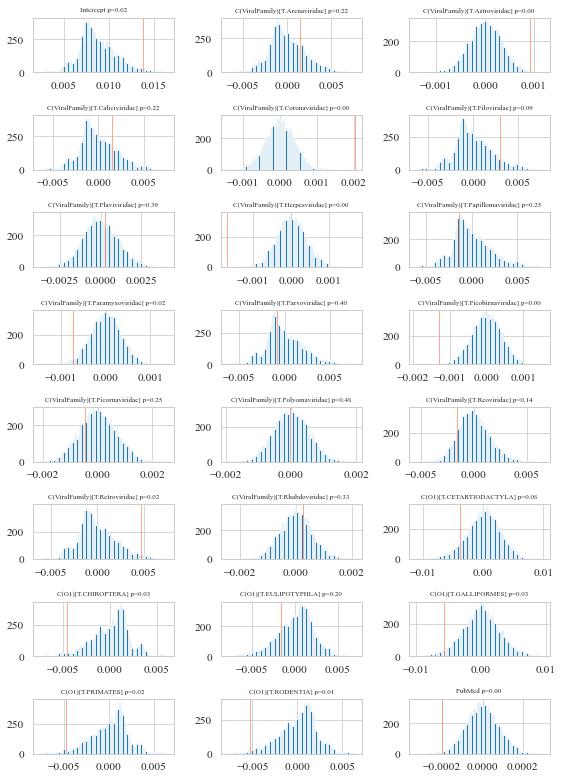

Wall time: 2min 23s


In [54]:
%%time
run_permutation_test(dependent = 'eigenvector_centrality', h1 = P, number_of_permutations = 10000)

                                           0
Intercept                           0.714884
C(ViralFamily)[T.Arenaviridae]     -0.026554
C(ViralFamily)[T.Astroviridae]      0.030821
C(ViralFamily)[T.Caliciviridae]    -0.101506
C(ViralFamily)[T.Coronaviridae]     0.043143
C(ViralFamily)[T.Filoviridae]       0.059989
C(ViralFamily)[T.Flaviviridae]     -0.028891
C(ViralFamily)[T.Herpesviridae]     0.127196
C(ViralFamily)[T.Papillomaviridae] -0.080060
C(ViralFamily)[T.Paramyxoviridae]   0.059292
C(ViralFamily)[T.Parvoviridae]     -0.050699
C(ViralFamily)[T.Picobirnaviridae] -0.011441
C(ViralFamily)[T.Picornaviridae]    0.038749
C(ViralFamily)[T.Polyomaviridae]    0.046488
C(ViralFamily)[T.Reoviridae]        0.084657
C(ViralFamily)[T.Retroviridae]      0.274126
C(ViralFamily)[T.Rhabdoviridae]     0.121098
C(O1)[T.CETARTIODACTYLA]           -0.020096
C(O1)[T.CHIROPTERA]                -0.160643
C(O1)[T.EULIPOTYPHLA]               0.060817
C(O1)[T.GALLIFORMES]               -0.222986
C(O1)[T.PR

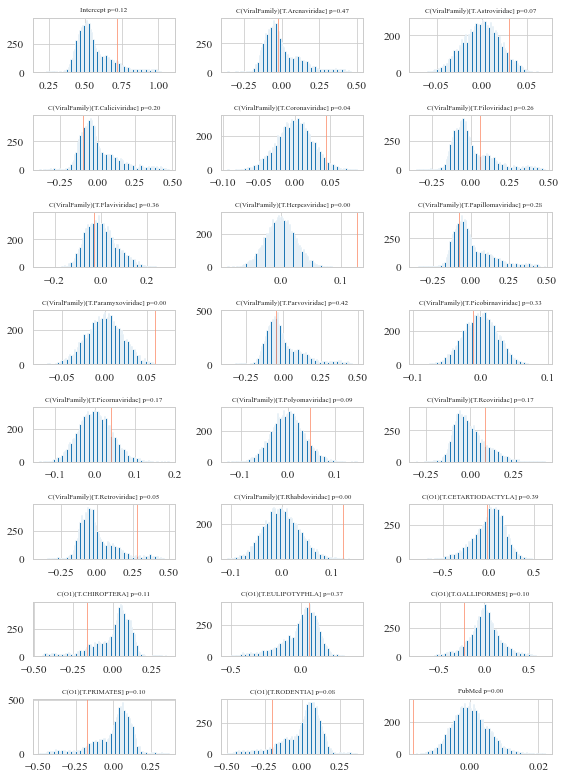

Wall time: 2min 20s


In [55]:
%%time
run_permutation_test(dependent = 'clustering', h1 = P, number_of_permutations = 10000)

In [56]:
P.O1.unique()

array(['CHIROPTERA', 'PRIMATES', 'RODENTIA', 'EULIPOTYPHLA',
       'GALLIFORMES', 'CARNIVORA', 'CETARTIODACTYLA'], dtype=object)

In [57]:
sorted(P.ViralFamily.unique())

['Adenoviridae',
 'Arenaviridae',
 'Astroviridae',
 'Caliciviridae',
 'Coronaviridae',
 'Filoviridae',
 'Flaviviridae',
 'Herpesviridae',
 'Papillomaviridae',
 'Paramyxoviridae',
 'Parvoviridae',
 'Picobirnaviridae',
 'Picornaviridae',
 'Polyomaviridae',
 'Reoviridae',
 'Retroviridae',
 'Rhabdoviridae']

In [58]:
P.groupby('ViralFamily')['degree'].mean().reset_index().sort_values('degree', ascending = False).ViralFamily.values

array(['Caliciviridae', 'Coronaviridae', 'Filoviridae', 'Retroviridae',
       'Flaviviridae', 'Astroviridae', 'Arenaviridae', 'Adenoviridae',
       'Rhabdoviridae', 'Polyomaviridae', 'Paramyxoviridae',
       'Parvoviridae', 'Picornaviridae', 'Papillomaviridae',
       'Picobirnaviridae', 'Reoviridae', 'Herpesviridae'], dtype=object)

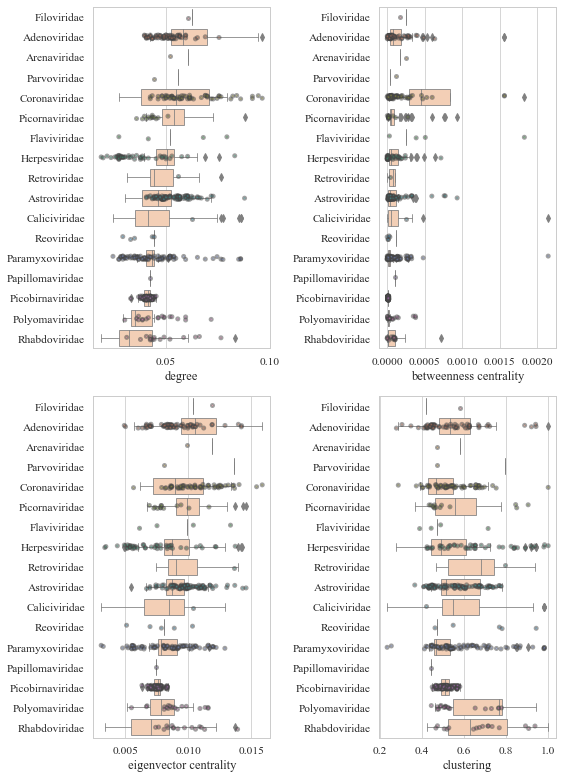

In [59]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

palette ={"known_network":"#99d594","predicted_network":"#476a9e"}
pal = ["#99d594", "#042659"]
#cmap = cmap(flatui)
#sns.set_palette(pal)
f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize = (8, 11), sharey= False)
#palette="Blues"
c = '#2b8cbe'
a = 0.5
lw = 3
w = 0.8
order_w = P.groupby('ViralFamily')['degree'].mean().reset_index().sort_values('degree', ascending = False).ViralFamily.values
sns.boxplot(x="degree", y= 'ViralFamily', data= P, ax= ax1, width = w , order=order_w,  color="#fdcdac")
sns.stripplot(x="degree", y= 'ViralFamily', data=P, size=2, jitter=True, alpha  = a, linewidth=lw, ax= ax1)

sns.boxplot(x="betweenness_centrality", y= 'ViralFamily', data= P, ax= ax2, width = w, order=order_w,  color="#fdcdac")
sns.stripplot(x="betweenness_centrality", y= 'ViralFamily', data=P, size=2, jitter=True, alpha  = a, linewidth=lw, ax= ax2)
ax2.set_xlabel('betweenness centrality')

sns.boxplot(x="eigenvector_centrality", y= 'ViralFamily', data= P, ax= ax3, width = w, order=order_w,  color="#fdcdac")
sns.stripplot(x="eigenvector_centrality", y= 'ViralFamily', data=P, size=2, jitter=True, alpha  = a, linewidth=lw, ax= ax3)
ax3.set_xlabel('eigenvector centrality')

sns.boxplot(x="clustering", y= 'ViralFamily',  data= P, ax= ax4, width = w, order=order_w,  color="#fdcdac")
sns.stripplot(x="clustering", y= 'ViralFamily', data=P, size=2, jitter=True, alpha  = a, linewidth=lw, ax= ax4)

ax1.set_ylabel('')
ax2.yaxis.label.set_visible(False)
ax3.set_ylabel('')
ax4.yaxis.label.set_visible(False)
ax1.set_xticks([0.05, 0.10])

plt.tight_layout()
plt.savefig('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/Prediction_centrality_comparisons_PREDICT_viruses.png', dpi = 600)
plt.savefig('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/Prediction_centrality_comparisons_PREDICT_viruses.svg', dpi = 600)
plt.savefig('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/Prediction_centrality_comparisons_PREDICT_viruses.pdf', dpi = 600)
plt.show()